In [1]:
!ls

ratings.dat  sample_data


In [0]:
filepath = 'ratings.dat'
# a = DataSet(filepath)

In [0]:
import numpy as np
import pandas as pd


In [4]:
# filename = './Data/ml-1m/u.data'
name = ['user', 'item', 'ratings', 'time']
df1 = pd.read_csv('ratings.dat', sep='::', names = name)
df1 = df1.drop(columns=['time'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [0]:
data_dim = len(df1.user.unique()), len(df1.item.unique())

In [6]:
data_dim[0]

6040

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
data = np.array(df1)
train, test = train_test_split(data, test_size=0.2)

In [0]:
u_train = train[:,0]
i_train = train[:,1]
r_train = train[:,2]
u_test = test[:,0]
i_test = test[:,1]
r_test = test[:,2]

In [0]:
# r_train = r_train/5
# r_test = r_test/5

In [11]:
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import dot, concatenate, Embedding, Input, Flatten, Dropout, Dense
from keras.models import Sequential
from keras import optimizers
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
len_dim_i = [128,256,512]
len_dim_u = [128,256,512]
len_dim_r = [600,300]

In [0]:
user_id_input = Input(shape=[1], name='user')
item_id_input = Input(shape=[1], name='item')

user_embedding = Embedding(output_dim=10, input_dim=data_dim[0] + 1,
                                   input_length=1, name='user_embedding')(user_id_input)
item_embedding = Embedding(output_dim=10, input_dim=data_dim[1] + 1,
                                   input_length=1, name='item_embedding')(item_id_input)

# reshape from shape: (batch_size, input_length, embedding_size)
# to shape: (batch_size, input_length * embedding_size) which is
# equal to shape: (batch_size, embedding_size)

user_vecs = (Dense(300))(user_embedding)
item_vecs = (Dense(300))(item_embedding)
user_vecs = (Dense(600))(user_embedding)
item_vecs = (Dense(600))(item_embedding)
# for i in range(len(len_dim_u)):
#     user_vecs = (Dense(len_dim_u[i], activation="relu"))(user_vecs)
# #     user_vecs = (Dropout(0.1))(user_vecs)
# for i in range(len(len_dim_i)):
#     item_vecs = (Dense(len_dim_i[i], activation="relu"))(item_vecs)
#     item_vecs = (Dropout(0.1))(item_vecs)
user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)

    
# y = merge([user_vecs, item_vecs], mode='dot', output_shape=(1,))
y = concatenate([user_vecs, item_vecs])
for i in range(len(len_dim_r)):
    y = (Dense(len_dim_r[i], activation="relu"))(y)
    y = (BatchNormalization())(y)
    y = (Dropout(0.2))(y)
# y = Dense(1, activation="relu")(y)
# M = Sequential()
# M.add(y)
# y = (Dropout(0.25))(y)
# y = (Dense(64))(y)
# y = (Dropout(0.2))(y)
# y = (Dense(32))(y)
# y = (Dropout(0.25))(y)
# y = (Dense(16))(y)
# y = (Dropout(0.1))(y)
# y = (Dense(4))(y)
# y = (Dropout(0.2))(y)
y = (Dense(1, activation='relu'))(y)

model = Model(inputs=[user_id_input, item_id_input], outputs=[y])
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mse',metrics=['accuracy'])

In [14]:
history = model.fit([u_train,i_train], r_train,validation_data=([u_test,i_test], r_test), batch_size=512, epochs = 50, verbose=1)

Train on 800167 samples, validate on 200042 samples
Epoch 1/50
800167/800167 [==============================] - 21s 26us/step - loss: 4.1559 - acc: 0.2452 - val_loss: 3.2468 - val_acc: 0.2931
Epoch 2/50
800167/800167 [==============================] - 19s 24us/step - loss: 3.1914 - acc: 0.3076 - val_loss: 2.8831 - val_acc: 0.3378
Epoch 3/50
800167/800167 [==============================] - 19s 24us/step - loss: 2.8232 - acc: 0.3357 - val_loss: 2.4557 - val_acc: 0.3599
Epoch 4/50
800167/800167 [==============================] - 19s 24us/step - loss: 1.9264 - acc: 0.3610 - val_loss: 1.5458 - val_acc: 0.3853
Epoch 5/50
800167/800167 [==============================] - 19s 24us/step - loss: 1.4874 - acc: 0.3774 - val_loss: 1.1206 - val_acc: 0.3966
Epoch 6/50
800167/800167 [==============================] - 19s 24us/step - loss: 1.1225 - acc: 0.3891 - val_loss: 1.0033 - val_acc: 0.3956
Epoch 7/50
800167/800167 [==============================] - 19s 24us/step - loss: 0.9937 - acc: 0.3994 - val

In [15]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 10)        60410       user[0][0]                       
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 10)        37070       item[0][0]                       
__________________________________________________________________________________________________
flatten_1 

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

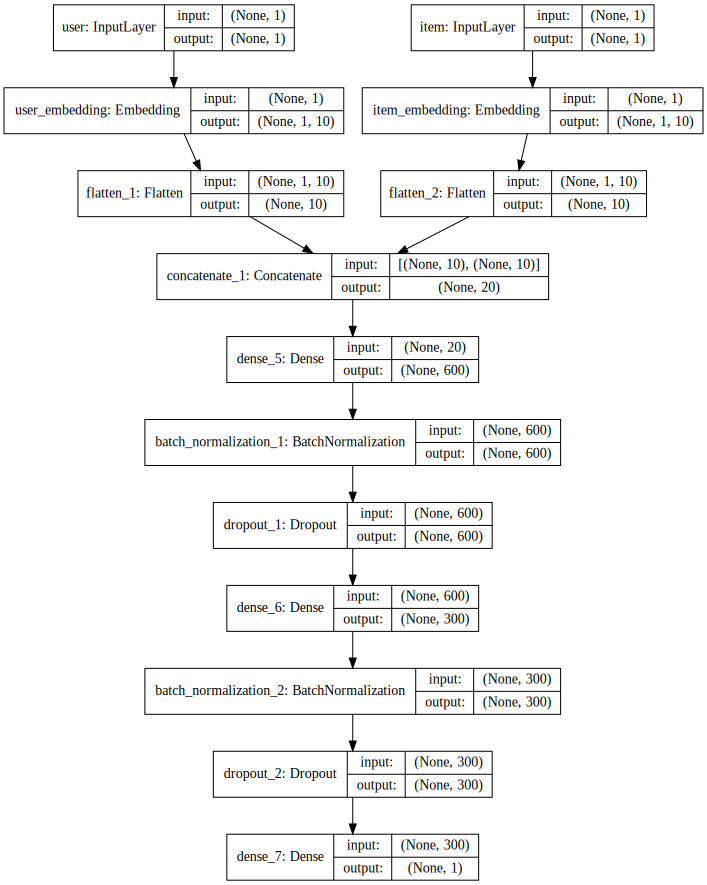

In [17]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [0]:
# print(history)

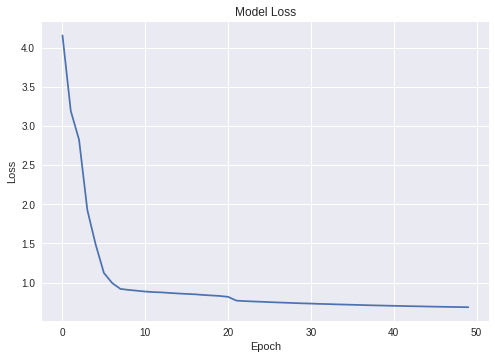

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

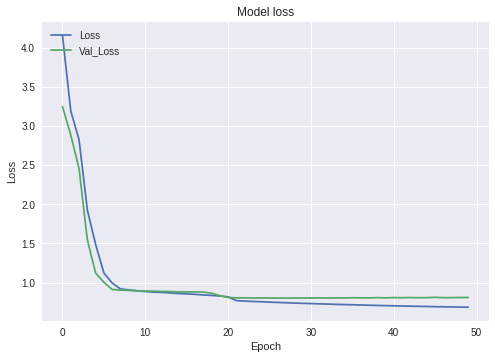

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

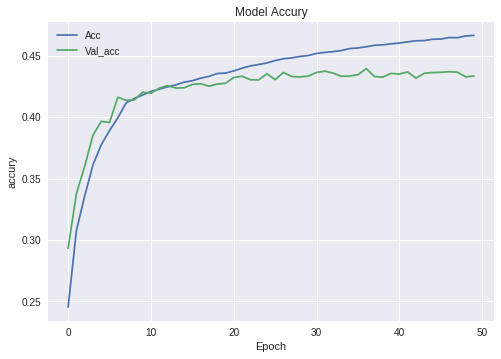

In [24]:
# Plot training & validation loss values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accury')
plt.ylabel('accury')
plt.xlabel('Epoch')
plt.legend(['Acc', 'Val_acc'], loc='upper left')
plt.show()